<a href="https://colab.research.google.com/github/milashu7/Projects_milashu7/blob/master/stat_tests_eda_4_Lu_Shu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.
 
 
Также ответьте на вопрос:
Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.


In [51]:
# Домашнее задание

# 1. Проверить на нормальность распределения выборки Petersburg и Magadan
# 1.* Для объединения понять чем заполнить Peterburg
# 2. Объединить и проверить на наличие корреляций
# 3. Выдвинуть гипотезу (Какова разница в среднем размере мидии в зависимости от города-производителя)
# 4. Сделать вывод по гипотезе

import pandas as pd #для работы с таблицами
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105] 
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]           

In [52]:
# 1. Проверка данных на нормальность
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

# Установим уровень значимости
alpha = 0.05

# Тест Шапиро-Уилка для выборки Petersburg
from scipy.stats import shapiro

_, p = shapiro(petersburg)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.242
Данные распределены нормально


При нормальном распределении средняя арифметическая, мода и медиана будут равны между собой, поэтому добавим значение средней в выборку Petersburg для последующего их объединения. 

In [53]:
from statistics import mean
petersburg.append(mean(petersburg))
# display(petersburg)

from scipy.stats import shapiro

# Тест Шапиро-Уилка для выборки Magadan
_, p = shapiro(magadan)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.036
Данные не распределены нормально (мы отвергаем H0)


In [54]:
# 2. Объединить и проверить на наличие корреляций
data = pd.DataFrame({ 
        'petersburg': petersburg,'magadan': magadan})
display (data)
# Для наличие корреляций будем проводить корреляцию Спирмена (так как переменные - количественные)
data.corr('spearman')

#display(data[0])
from scipy.stats import spearmanr
corr, p = spearmanr(data['petersburg'], data['magadan'])
print(corr,p)

,petersburg,magadan
0,0.097400,0.1033
1,0.135200,0.0915
2,0.081700,0.0781
3,0.101600,0.0685
4,0.096800,0.0677
5,0.106400,0.0697
6,0.105000,0.0764
7,0.103443,0.0689


0.1666666666666667 0.693238811728395


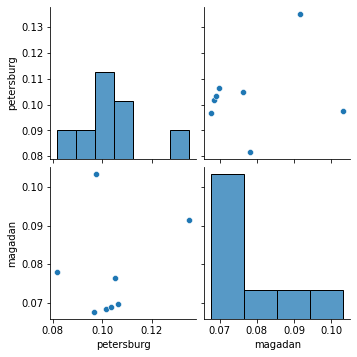

In [55]:
# Полученный коэффициент корреляции 0.1667  и значение p_value = 0.69 говорит об отсутсвии связи или очень слабой корреляции данных
# Проиллюстрируем это графиками зависимостей

import seaborn as sns
sns.pairplot(data)

In [56]:
# 3. Выдвинуть гипотезу (Какова разница в среднем размере мидии в зависимости от города-производителя)

# Зависимая переменная (диаметр пиццы) является количественной. Группы происходят из разных совокупностей. 
# Следовательно, будем использовать независимый T-тест.

H0 = 'Нет значимой разницы между средним размером раковины мидий в представленных городах.'
Ha = 'Есть значимая разница между средним размером раковины мидий в представленных городах.'

from scipy.stats import ttest_ind

def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(data['petersburg'], data['magadan'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(data)


*** Результаты независимого T-теста ***
0.0 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средним размером раковины мидий в представленных городах.


In [57]:
# 4. Сделать вывод по гипотезе
# P_value = 0.0 < 0.05, мы отвергаем нулевую гипотезу и принимаем альтернативную, 
# это означает, что есть значимая разница между средним размером раковины мидий в представленных городах.

In [58]:
# Проиллюстрируем сделанные с применением статистических тестов выводы (внимание на среднее и стандартное отклонение)
data.describe()

,petersburg,magadan
count,8.000000,8.000000
mean,0.103443,0.078012
std,0.015007,0.012945
min,0.081700,0.067700
25%,0.097250,0.068800
50%,0.102521,0.073050
75%,0.105350,0.081450
max,0.135200,0.103300
